# **Libraries**

Import semua library yang dibutuhkan.

In [354]:
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])

from dython.nominal import identify_numeric_columns,identify_nominal_columns,associations
from joblib import dump

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

In [355]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

# **Data**

Import dataset bank-additional-full.csv ke dalam variabel **bank_marketing**.

In [356]:
bank_marketing = pd.read_csv("bank-additional-full.csv",sep=";")
bank_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Buat salinan data asli dengan mendefinisikannya sebagai df, sehingga data asli tidak rusak.

In [357]:
df = bank_marketing.copy()

# **Pre-processing Data**

Melihat informasi mengenai dataset yang digunakan.

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [359]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [360]:
df.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


Ganti semua *unknown* dengan *NaN* dan hapus semua nilai *NaN*.

In [361]:
df = df.replace("unknown",np.nan)
df = df.dropna()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Cari nilai korelasi untuk setiap variabel. Untuk menemukan korelasi antara variabel numerik dan kategorik, kita dapat menggunakan bantuan library *Dython*.

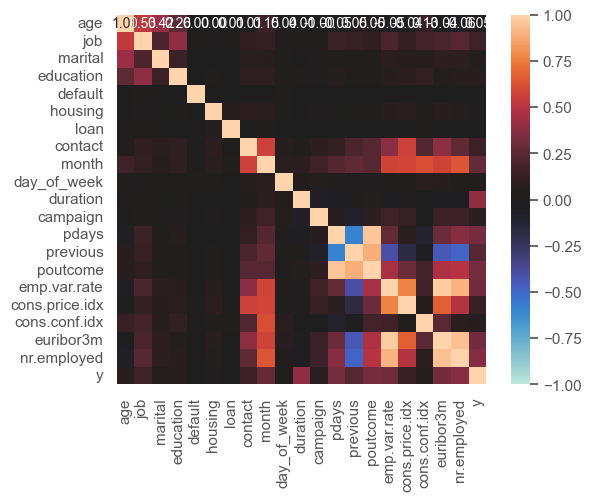

In [362]:
corr = associations(df)

Karena kita hanya ingin melihat korelasi antara fitur dan target, kita dapat mengambil kolom *y* saja.

In [363]:
df_corr = corr["corr"][["y"]].iloc[:-1].sort_values("y",ascending=False)
df_corr.style.background_gradient(cmap="RdYlGn",axis=None)

,y
duration,0.393530
nr.employed,0.364230
pdays,0.327509
poutcome,0.322919
euribor3m,0.315869
emp.var.rate,0.305365
month,0.277624
previous,0.228003
job,0.153701
contact,0.143642


Berdasarkan [PH717 Module 9 - Correlation and Regression](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html), kekuatan koefisien korelasi dapat dijelaskan sebagai berikut:

| Correlation Coefficient | Decription |
| :---: | :---: |
| 1.0 | Perfect Positive |
| 0.8 to 1.0 | Very Strong |
| 0.6 to 0.8 | Strong |
| 0.4 to 0.6 | Moderate |
| 0.2 to 0.4 | Weak |
| 0.0 to 0.2 | Very Weak |
| 0.0 to -0.2 | Very Weak |
| -0.2 to -0.4 | Weak |
| -0.4 to -0.6 | Moderate |
| -0.6 to -0.8 | Strong |
| -0.8 to -1.0 | Very Strong |
| -1.0 | Perfect Negative |

Berdasarkan tabel di atas, dapat dilihat bahwa terdapat 8 variabel yang memiliki korelasi lemah hingga sedang (warna merah) dan 12 variabel yang memiliki korelasi sangat lemah (warna abu-abu).

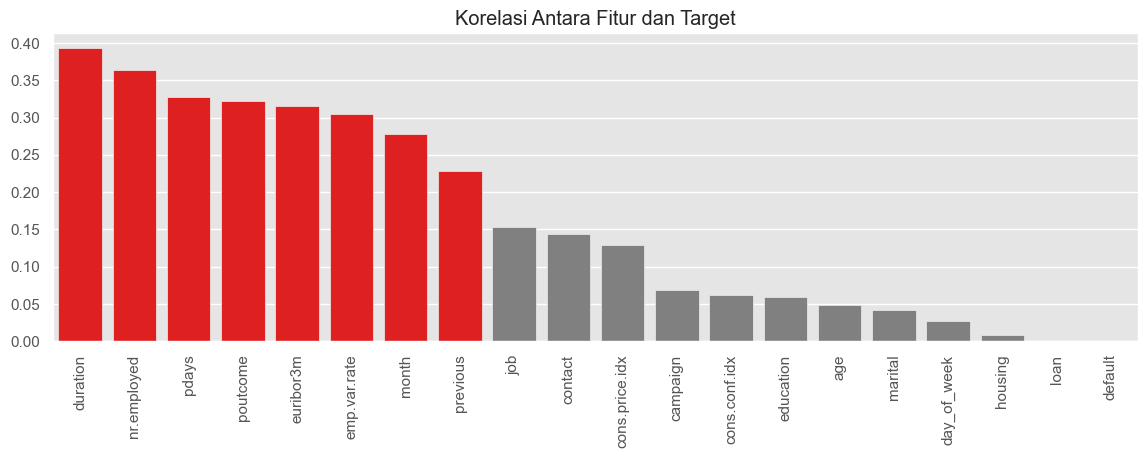

In [364]:
plt.figure(figsize=(14,4))
sns.barplot(data=df_corr,x=df_corr.index,y="y",palette=["red" if i >= 0.2 else "grey" for i in df_corr["y"]])
plt.title("Korelasi Antara Fitur dan Target")
plt.xticks(rotation=90)
plt.ylabel("")
plt.show()

Hapus 12 variabel yang memiliki korelasi sangat lemah.

In [365]:
df = df[list(df_corr[df_corr["y"] >= 0.2].index) + ["y"]]
df.head()

,duration,nr.employed,pdays,poutcome,euribor3m,emp.var.rate,month,previous,y
0,261,5191.0,999,nonexistent,4.857,1.1,may,0,no
2,226,5191.0,999,nonexistent,4.857,1.1,may,0,no
3,151,5191.0,999,nonexistent,4.857,1.1,may,0,no
4,307,5191.0,999,nonexistent,4.857,1.1,may,0,no
6,139,5191.0,999,nonexistent,4.857,1.1,may,0,no


Setelah beberapa variabel dihapus, identifikasi kolom mana yang bersifat numerik dan kategorik.

In [366]:
cat_columns,num_columns = identify_nominal_columns(df),identify_numeric_columns(df)
for i,j in zip(["Categorical Columns","Numerical Columns"],[cat_columns,num_columns]):
    print(f"{i}\t: {j}")

Categorical Columns	: ['poutcome', 'month', 'y']
Numerical Columns	: ['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous']


Melihat apa saja isi dari kolom yang bersifat kategorik.

In [367]:
for i in cat_columns:
    print(f'{i} = {df[i].unique()}')

poutcome = ['nonexistent' 'failure' 'success']
month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
y = ['no' 'yes']


Beri label pada data yang bersifat kategorik.

In [368]:
le = LabelEncoder()
df_encode=df[cat_columns].apply(le.fit_transform)

df_not_encode=df[num_columns]

Gabungkan data numerik dengan data kategorik yang sudah diberi label.

In [369]:
df = pd.concat([df_not_encode,df_encode], axis = 1)
df.head()

,duration,nr.employed,pdays,euribor3m,emp.var.rate,previous,poutcome,month,y
0,261,5191.0,999,4.857,1.1,0,1,6,0
2,226,5191.0,999,4.857,1.1,0,1,6,0
3,151,5191.0,999,4.857,1.1,0,1,6,0
4,307,5191.0,999,4.857,1.1,0,1,6,0
6,139,5191.0,999,4.857,1.1,0,1,6,0


Periksa apakah terdapat missing values.

In [370]:
df.isna().sum()

duration        0
nr.employed     0
pdays           0
euribor3m       0
emp.var.rate    0
previous        0
poutcome        0
month           0
y               0
dtype: int64

Buat variabel X (fitur) dan y (target).

In [371]:
X = df.drop(columns = 'y')
y = df['y']

Pisahkan dataset menjadi data training dan data testing.

In [372]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=13)

print(f"Training dataset\t: {np.round(len(X_train)/len(X)*100,4)}%")
print(f"Testing dataset\t\t: {np.round(len(X_test)/len(X)*100,4)}%")

Training dataset	: 69.998%
Testing dataset		: 30.002%


Standarisasi semua variabel X.

In [373]:
standard = StandardScaler()
scaled_X_train = standard.fit_transform(X_train)
scaled_X_test = standard.transform(X_test)

# **Logistic Regression**

Buat model logistic regression.

In [374]:
lr_model = LogisticRegression(class_weight="balanced",random_state=666,max_iter=5000)
lr_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=666)

Prediksi dengan menggunakan model logistic regression.

In [375]:
lr_pred = lr_model.predict(scaled_X_test)

Evaluasi model logistic regression.

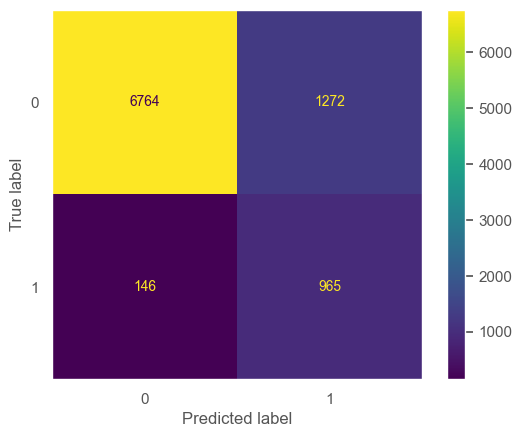

Accuracy Score: 84.5%


In [376]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,lr_pred,ax=plt.gca())
plt.grid(False)
plt.show()

lr_accuracy=np.round(accuracy_score(y_test,lr_pred),3)
print(f"Accuracy Score: {lr_accuracy*100}%")

In [377]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8036
           1       0.43      0.87      0.58      1111

    accuracy                           0.84      9147
   macro avg       0.71      0.86      0.74      9147
weighted avg       0.91      0.84      0.87      9147



Buat dataframe yang berisi accuracy, precision, recall, dan f1 untuk model logistic regression.

In [378]:
lr_precision=np.round(precision_score(y_test, lr_pred),3)
lr_recall=np.round(recall_score(y_test, lr_pred),3)
lr_f1=np.round(f1_score(y_test, lr_pred),3)

In [379]:
lr_score = {
    'Model': 'Logistic Regression',
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'f1': lr_f1
}
lr_score = pd.DataFrame(lr_score, index=[''])
lr_score

,Model,Accuracy,Precision,Recall,f1
,Logistic Regression,0.845,0.431,0.869,0.576


Buat model logistic regression akhir dengan melakukan fitting terhadap seluruh dataset.

In [380]:
final_lr_model = LogisticRegression(class_weight="balanced",random_state=666,max_iter=5000)
final_lr_model.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=666)

Menunjukkan koefisien beta dari model logistic regression.

In [381]:
pd.DataFrame(data=[final_lr_model.intercept_[0]] + list(final_lr_model.coef_[0]),
             columns=["Unstandardized Coefficients"],
             index=["Constant"] + list(X.columns)).rename_axis(index="Variable")

,Unstandardized Coefficients
Variable,
Constant,0.013051
duration,0.006268
nr.employed,0.000037
pdays,-0.001925
euribor3m,-0.336722
emp.var.rate,-0.481327
previous,-0.150330
poutcome,0.263262
month,-0.062323


Tuliskan persamaan model regresi logistic regression di mana:
$$ \pi(x) = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n}} $$

In [382]:
e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(final_lr_model.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(final_lr_model.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(0.006268*(duration) - 0.481327*(emp.var.rate) - 0.336722*(euribor3m) - 0.062323*(month) + 3.7e-5*(nr.employed) - 0.001925*(pdays) + 0.263262*(poutcome) - 0.15033*(previous) + 0.013051)/(e**(0.006268*(duration) - 0.481327*(emp.var.rate) - 0.336722*(euribor3m) - 0.062323*(month) + 3.7e-5*(nr.employed) - 0.001925*(pdays) + 0.263262*(poutcome) - 0.15033*(previous) + 0.013051) + 1))

# **K-Nearest Neighbors (KNN)**

Temukan nilai *K* yang optimal dengan cara membandingkan nilai *K* dengan tingkat kesalahannya.

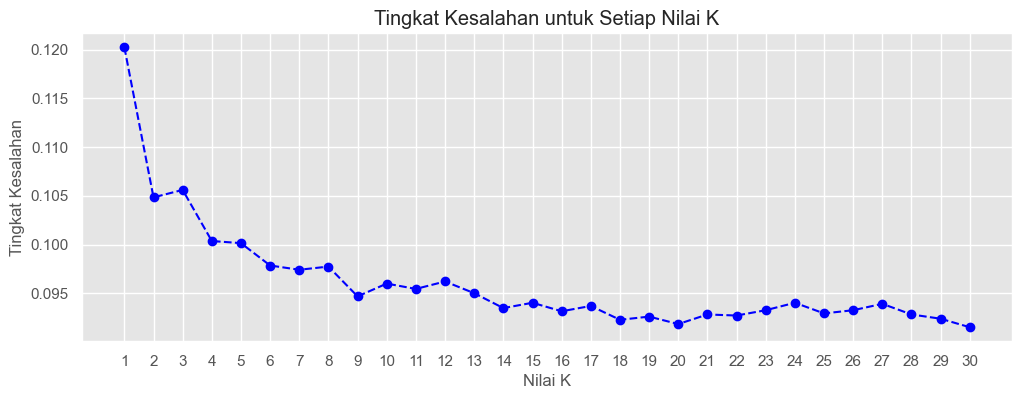

In [383]:
errors = []
for i in range(1,31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    errors.append(error)

plt.figure(figsize=(12,4))
plt.plot(range(1,31),errors,color="blue",marker="o",ls="--")
plt.title("Tingkat Kesalahan untuk Setiap Nilai K")
plt.xlabel("Nilai K")
plt.xticks(range(1,31))
plt.ylabel("Tingkat Kesalahan")
plt.show()

Berdasarkan plot di atas, dapat dilihat bahwa nilai *K* yang optimal adalah 9. Oleh karena itu, buatlah model KNN dengan *K* = 9.

In [384]:
k = 9
knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

Prediksi menggunakan model KNN.

In [385]:
knn_pred = knn_model.predict(scaled_X_test)

Evaluasi model KNN.

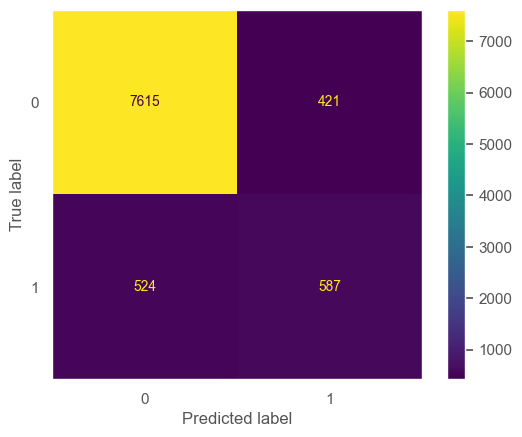

Accuracy Score: 89.7%


In [386]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,knn_pred,ax=plt.gca())
plt.grid(False)
plt.show()

knn_accuracy=np.round(accuracy_score(y_test,knn_pred),3)
print(f"Accuracy Score: {knn_accuracy*100}%")

In [387]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8036
           1       0.58      0.53      0.55      1111

    accuracy                           0.90      9147
   macro avg       0.76      0.74      0.75      9147
weighted avg       0.89      0.90      0.89      9147



Buat dataframe yang berisi accuracy, precision, recall, dan f1 untuk model KNN.

In [388]:
knn_precision=np.round(precision_score(y_test, knn_pred),3)
knn_recall=np.round(recall_score(y_test, knn_pred),3)
knn_f1=np.round(f1_score(y_test, knn_pred),3)

In [389]:
knn_score = {
    'Model': 'K-Nearest Neighbors',
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'f1': knn_f1
}
knn_score = pd.DataFrame(knn_score, index=[''])
knn_score

,Model,Accuracy,Precision,Recall,f1
,K-Nearest Neighbors,0.897,0.582,0.528,0.554


Buat model KNN akhir dengan melakukan fitting terhadap seluruh dataset.

In [390]:
final_knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
final_knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=9, weights='distance')

# **Support Vector Machine (SVM)**

Buat model SVM.

In [391]:
svm_model = SVC(class_weight="balanced",random_state=666)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=666)

Prediksi menggunakan model SVM.

In [392]:
svm_pred = svm_model.predict(scaled_X_test)

Evaluasi model SVM.

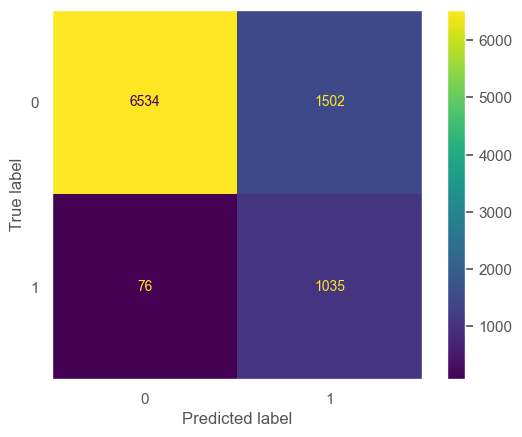

Accuracy Score: 82.69999999999999%


In [393]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,ax=plt.gca())
plt.grid(False)
plt.show()

svm_accuracy=np.round(accuracy_score(y_test,svm_pred),3)
print(f"Accuracy Score: {svm_accuracy*100}%")

In [394]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      8036
           1       0.41      0.93      0.57      1111

    accuracy                           0.83      9147
   macro avg       0.70      0.87      0.73      9147
weighted avg       0.92      0.83      0.85      9147



Buat dataframe yang berisi accuracy, precision, recall, dan f1 untuk model SVM.

In [395]:
svm_precision=np.round(precision_score(y_test, svm_pred),3)
svm_recall=np.round(recall_score(y_test, svm_pred),3)
svm_f1=np.round(f1_score(y_test, svm_pred),3)

In [396]:
svm_score = {
    'Model': 'Support Vector Machine',
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'f1': svm_f1
}
svm_score = pd.DataFrame(svm_score, index=[''])
svm_score

,Model,Accuracy,Precision,Recall,f1
,Support Vector Machine,0.827,0.408,0.932,0.567


Buat model SVM akhir dengan melakukan fitting terhadap seluruh dataset.

In [397]:
final_svm_model = SVC(class_weight="balanced",random_state=666)
final_svm_model.fit(X,y)

SVC(class_weight='balanced', random_state=666)

# **Decision Tree**

Buah model decision tree.

In [398]:
dt_model = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=666)
dt_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=666)

Prediksi menggunakan model decision tree.

In [399]:
dt_pred = dt_model.predict(scaled_X_test)

Evaluasi model decision tree.

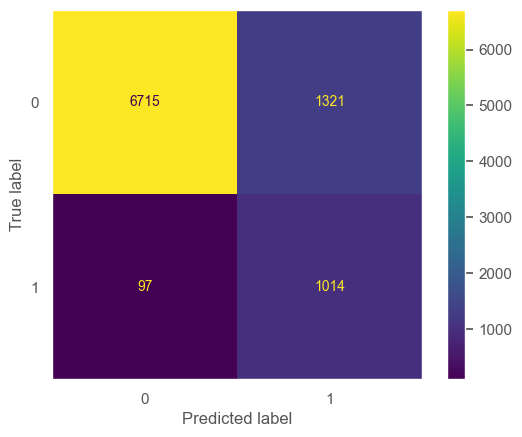

Accuracy Score: 84.5%


In [400]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,dt_pred,ax=plt.gca())
plt.grid(False)
plt.show()

dt_accuracy=np.round(accuracy_score(y_test,dt_pred),3)
print(f"Accuracy Score: {dt_accuracy*100}%")

In [401]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.90      8036
           1       0.43      0.91      0.59      1111

    accuracy                           0.84      9147
   macro avg       0.71      0.87      0.75      9147
weighted avg       0.92      0.84      0.87      9147



Buat dataframe yang berisi accuracy, precision, recall, dan f1 untuk model decision tree.

In [402]:
dt_precision=np.round(precision_score(y_test, dt_pred),3)
dt_recall=np.round(recall_score(y_test, dt_pred),3)
dt_f1=np.round(f1_score(y_test, dt_pred),3)

In [403]:
dt_score = {
    'Model': 'Decision Tree',
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'f1': dt_f1
}
dt_score = pd.DataFrame(dt_score, index=[''])
dt_score

,Model,Accuracy,Precision,Recall,f1
,Decision Tree,0.845,0.434,0.913,0.589


Tunjukkan setiap feature importance berdasarkan model decision tree.

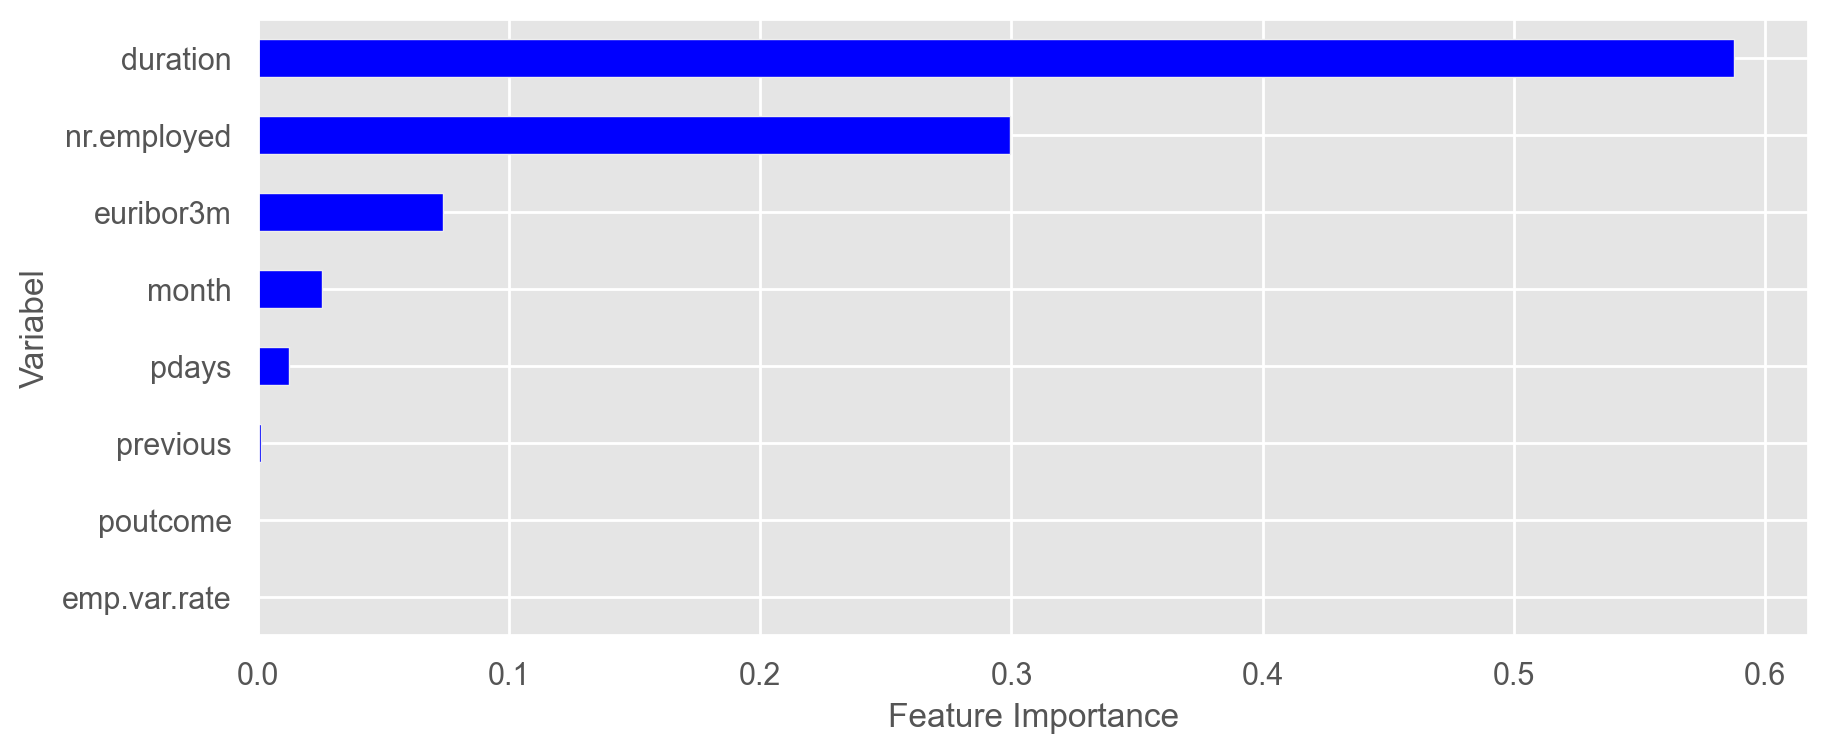

In [404]:
plt.figure(dpi=200)
pd.DataFrame(data=dt_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
            ).sort_values("Feature Importance",ascending=True).plot(figsize=(10,4),
                                                                     kind="barh",
                                                                     legend=None,
                                                                     color="blue",
                                                                     ax=plt.gca())
plt.xlabel("Feature Importance")
plt.ylabel("Variabel")
plt.show()

Buat model decision tree akhir dengan melakukan fitting terhadap seluruh dataset dan memvisualisasikannya.

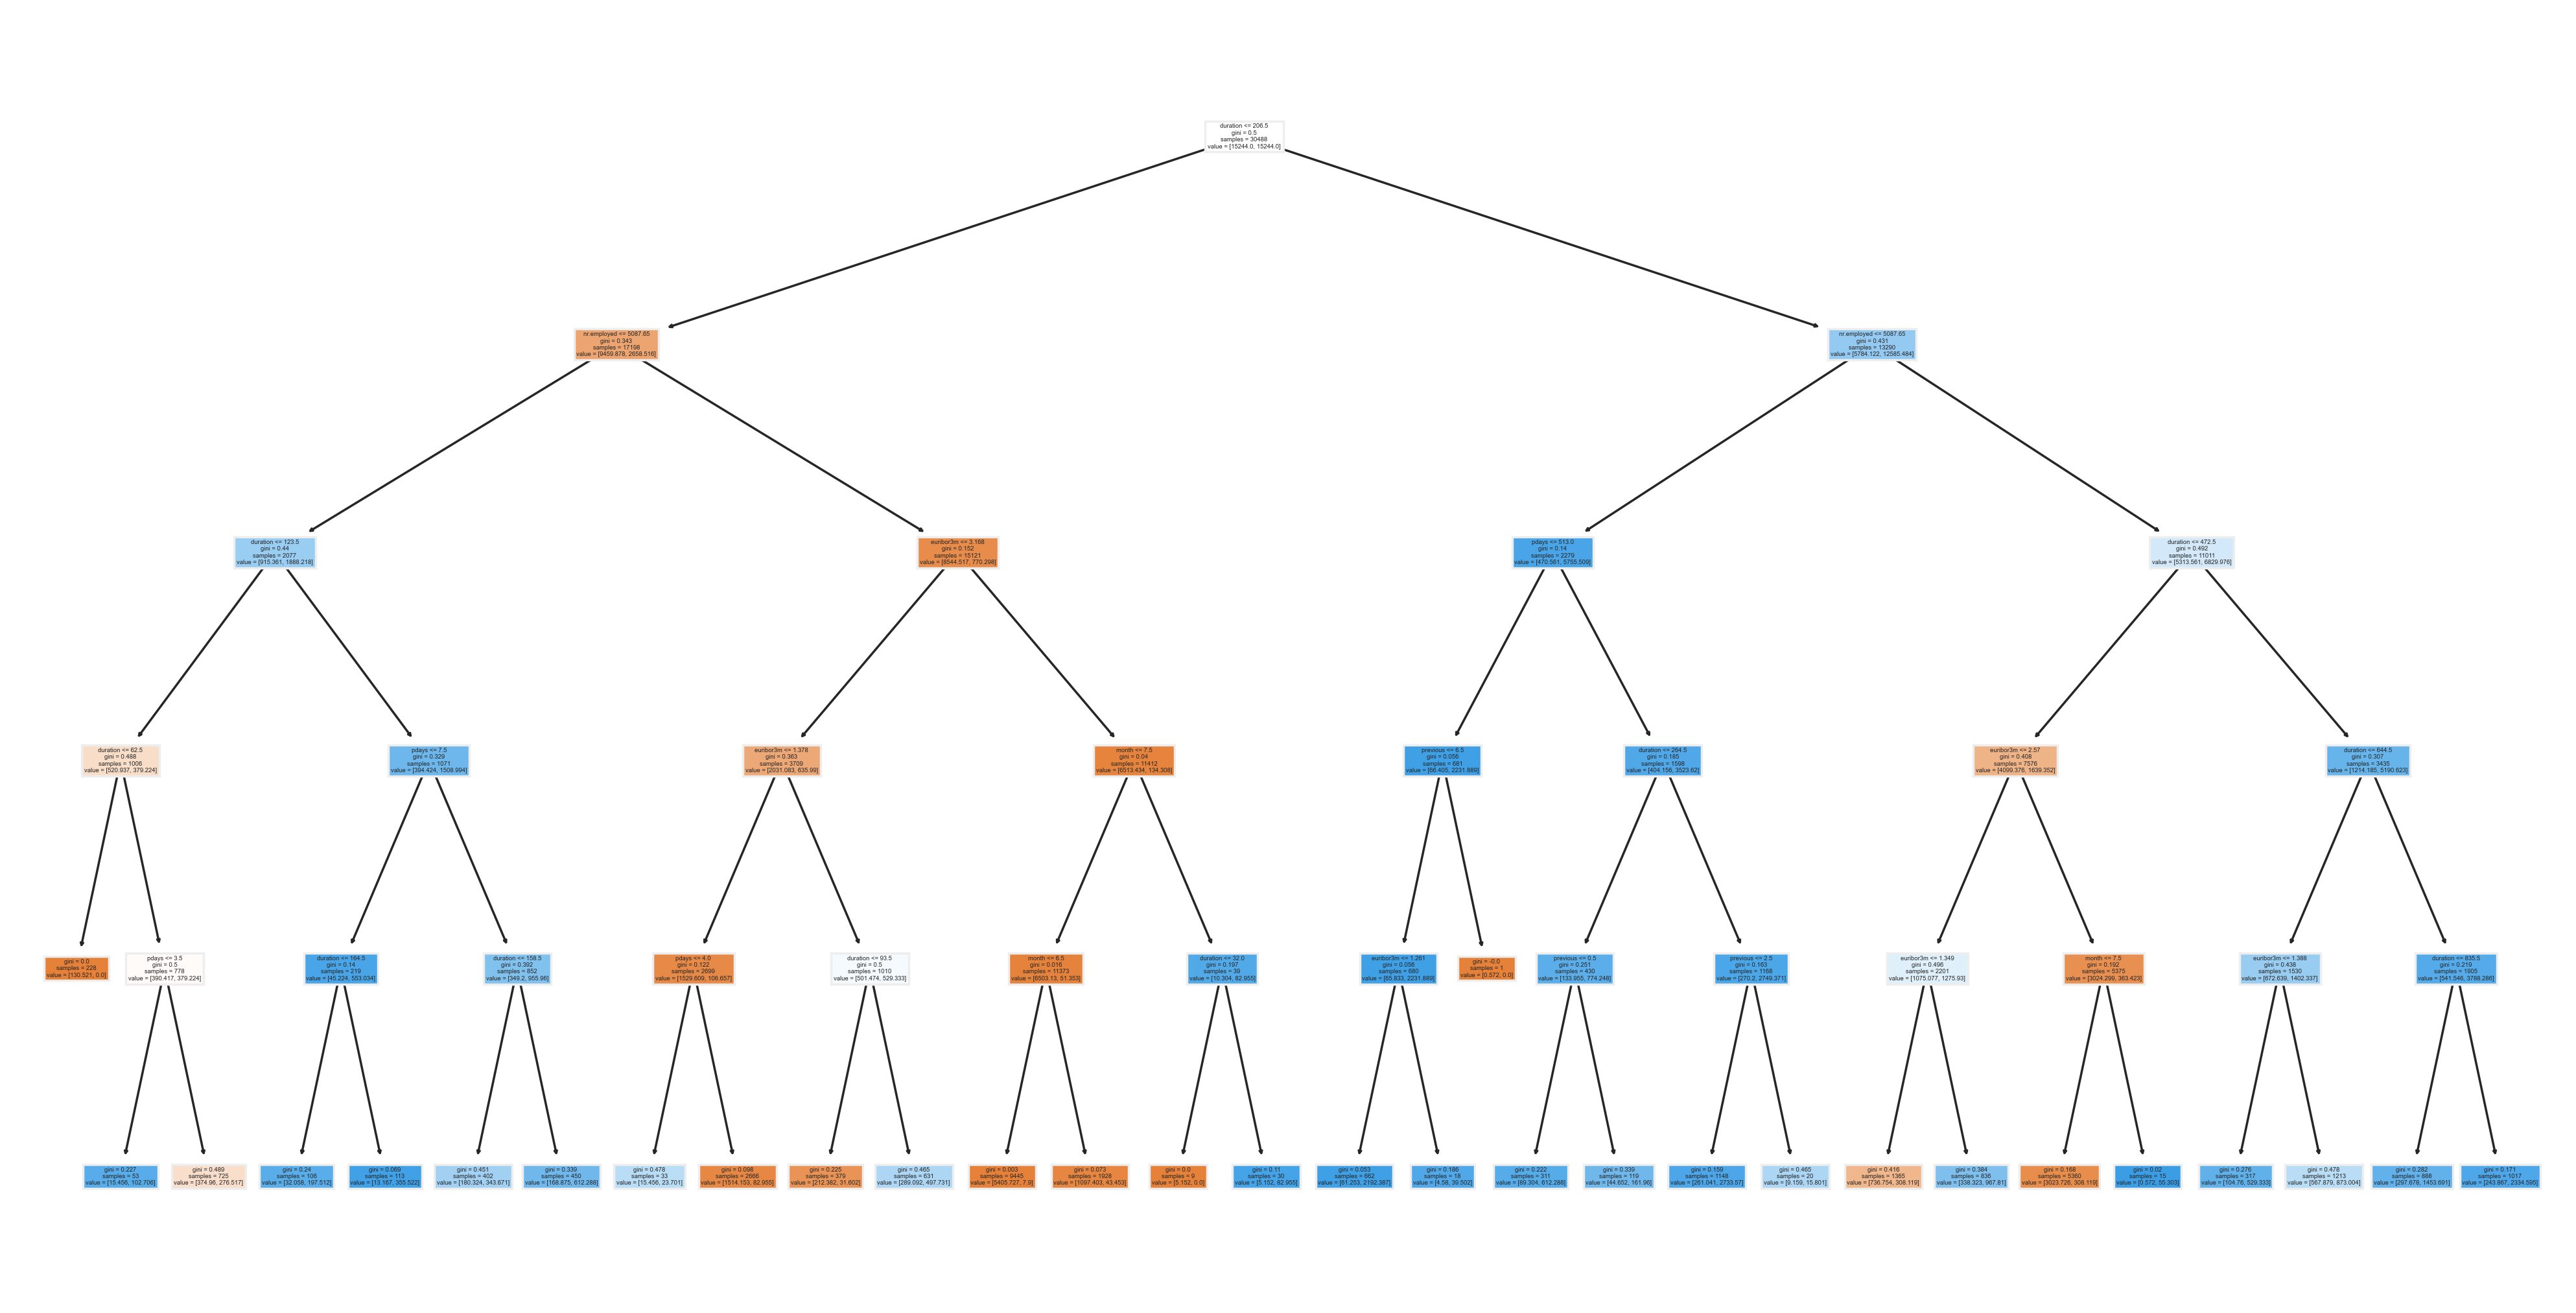

In [405]:
final_dt_model = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=666)
final_dt_model.fit(X,y)

plt.figure(figsize=(10,5),dpi=500)
plot_tree(final_dt_model,filled=True,feature_names=X.columns)
plt.show()

# **Random Forest**

Temukan jumlah trees yang optimal dengan membandingkan jumlah trees dengan tingkat kesalahannya.

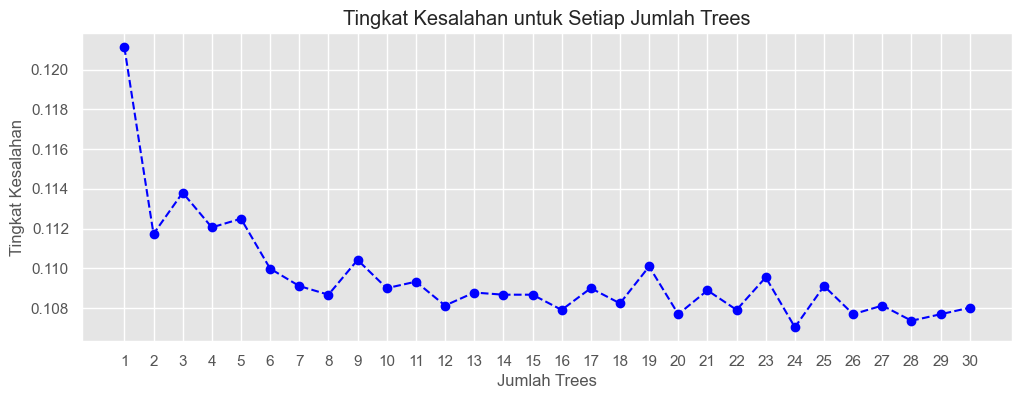

In [406]:
errors = []
for i in range(1,31):
    model = RandomForestClassifier(n_estimators=i,class_weight="balanced",random_state=666)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    errors.append(error)

plt.figure(figsize=(12,4))
plt.plot(range(1,31),errors,color="blue",marker="o",ls="--")
plt.title("Tingkat Kesalahan untuk Setiap Jumlah Trees")
plt.xlabel("Jumlah Trees")
plt.xticks(range(1,31))
plt.ylabel("Tingkat Kesalahan")
plt.show()

Berdasarkan plot di atas, dapat dilihat bahwa jumlah trees yang optimal adalah 8. Oleh karena itu, buatlah model random forest dengan jumlah trees = 8.

In [407]:
n = 8
rf_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=666)
rf_model.fit(scaled_X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=8,
                       random_state=666)

Prediksi menggunakan model random forest.

In [408]:
rf_pred = rf_model.predict(scaled_X_test)

Evaluasi model random forest.

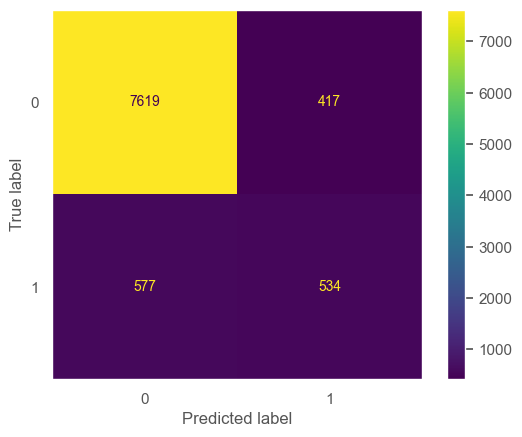

Accuracy Score: 89.1%


In [409]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,rf_pred,ax=plt.gca())
plt.grid(False)
plt.show()

rf_accuracy=np.round(accuracy_score(y_test,rf_pred),3)
print(f"Accuracy Score: {rf_accuracy*100}%")

In [410]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8036
           1       0.56      0.48      0.52      1111

    accuracy                           0.89      9147
   macro avg       0.75      0.71      0.73      9147
weighted avg       0.88      0.89      0.89      9147



Buat dataframe yang berisi accuracy, precision, recall, dan f1 untuk model random forest.

In [411]:
rf_precision=np.round(precision_score(y_test, rf_pred),3)
rf_recall=np.round(recall_score(y_test, rf_pred),3)
rf_f1=np.round(f1_score(y_test, rf_pred),3)

In [412]:
rf_score = {
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'f1': rf_f1
}
rf_score = pd.DataFrame(rf_score, index=[''])
rf_score

,Model,Accuracy,Precision,Recall,f1
,Random Forest,0.891,0.562,0.481,0.518


Tunjukkan setiap feature importance berdasarkan model random forest.

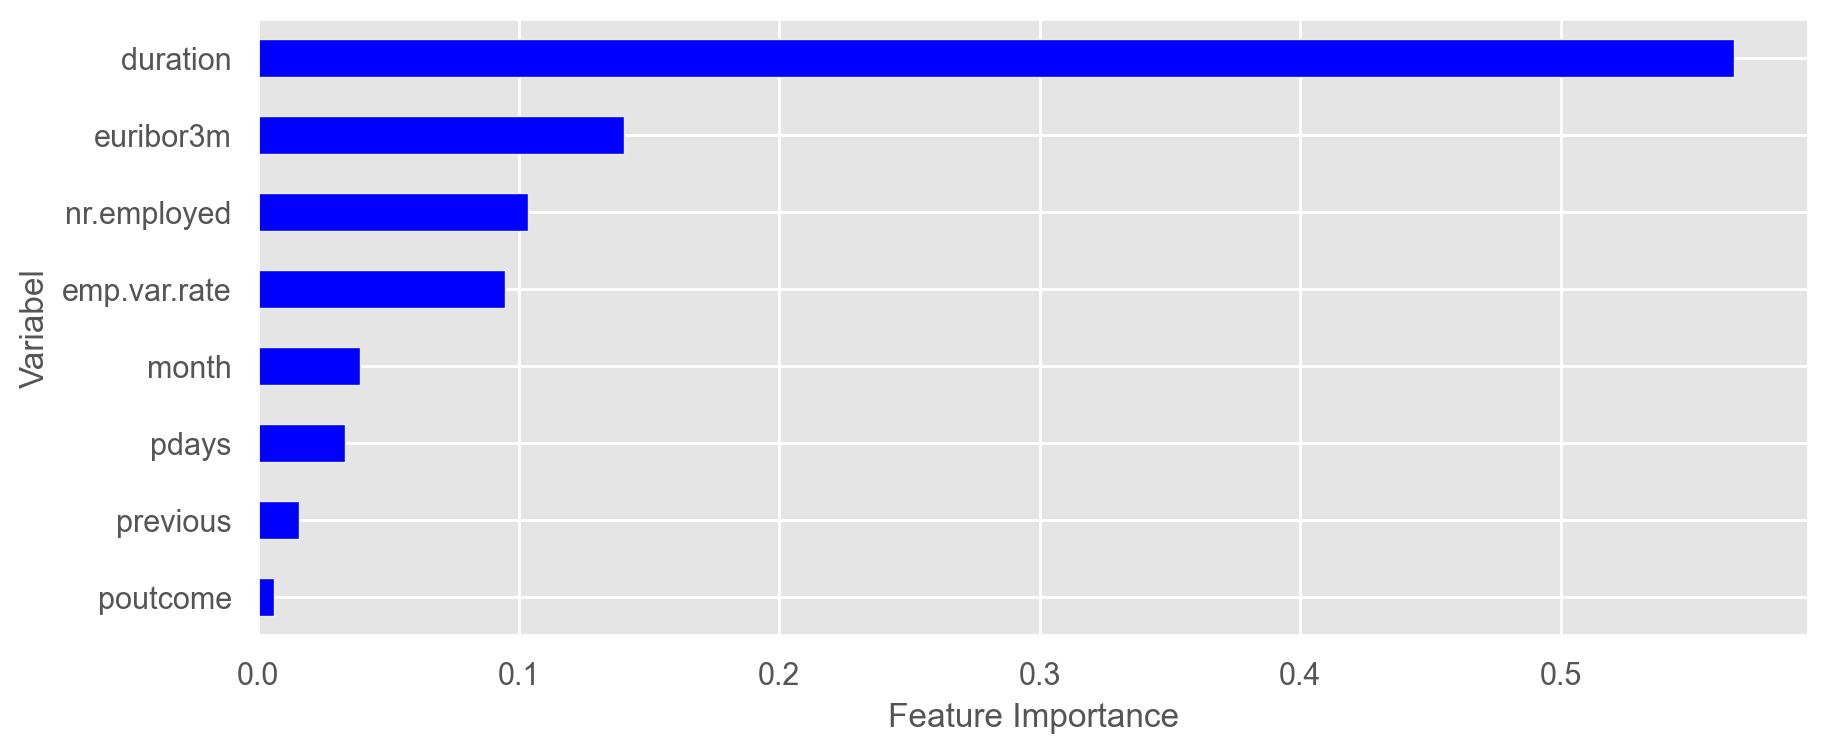

In [413]:
plt.figure(dpi=200)
pd.DataFrame(data=rf_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
            ).sort_values("Feature Importance",ascending=True).plot(figsize=(10,4),
                                                                    kind="barh",
                                                                    legend=None,
                                                                    color="blue",
                                                                    ax=plt.gca())
plt.xlabel("Feature Importance")
plt.ylabel("Variabel")
plt.show()

Buat model random forest akhir dengan melakukan fitting terhadap seluruh dataset.

In [414]:
final_rf_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=666)
final_rf_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', n_estimators=8,
                       random_state=666)

# **Naive Bayes**

Buat model naive bayes.

In [415]:
nb_model = GaussianNB()
nb_model.fit(scaled_X_train,y_train)

GaussianNB()

Prediksi menggunakan model naive bayes.

In [416]:
nb_pred = nb_model.predict(scaled_X_test)

Evaluasi model naive bayes.

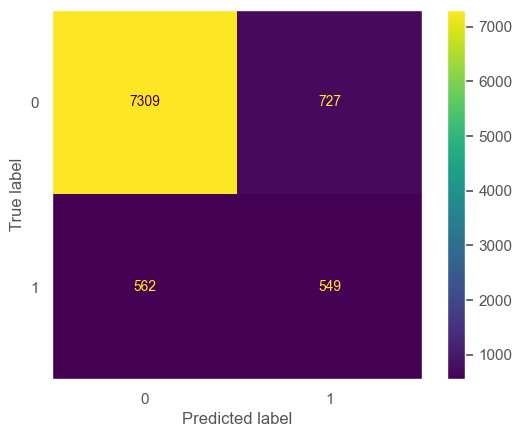

Accuracy Score: 85.9%


In [417]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,nb_pred,ax=plt.gca())
plt.grid(False)
plt.show()

nb_accuracy=np.round(accuracy_score(y_test,nb_pred),3)
print(f"Accuracy Score: {nb_accuracy*100}%")

In [418]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8036
           1       0.43      0.49      0.46      1111

    accuracy                           0.86      9147
   macro avg       0.68      0.70      0.69      9147
weighted avg       0.87      0.86      0.86      9147



Buat dataframe yang berisi accuracy, precision, recall, dan f1 untuk model naive bayes.

In [419]:
nb_precision=np.round(precision_score(y_test, nb_pred),3)
nb_recall=np.round(recall_score(y_test, nb_pred),3)
nb_f1=np.round(f1_score(y_test, nb_pred),3)

In [420]:
nb_score = {
    'Model': 'Naive Bayes',
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'f1': nb_f1
}
nb_score = pd.DataFrame(nb_score, index=[''])
nb_score

,Model,Accuracy,Precision,Recall,f1
,Naive Bayes,0.859,0.43,0.494,0.46


Buat model naive bayes akhir dengan melakukan fitting terhadap seluruh dataset.

In [421]:
final_nb_model = GaussianNB()
final_nb_model.fit(X,y)

GaussianNB()

# **The Best Algorithm Model**

Gabungkan semua dataframe yang berisi accuracy, precision, recall, dan f1 untuk semua model.

In [422]:
all_model_scores=pd.concat([lr_score,knn_score,svm_score,dt_score,rf_score,nb_score])
all_model_scores

,Model,Accuracy,Precision,Recall,f1
,Logistic Regression,0.845,0.431,0.869,0.576
,K-Nearest Neighbors,0.897,0.582,0.528,0.554
,Support Vector Machine,0.827,0.408,0.932,0.567
,Decision Tree,0.845,0.434,0.913,0.589
,Random Forest,0.891,0.562,0.481,0.518
,Naive Bayes,0.859,0.430,0.494,0.460


**Kesimpulan:** Meskipun model KNN, random forest, dan naive bayes memiliki nilai *accuracy* yang lebih tinggi daripada model lainnya, dapat dilihat pada confusion matrix bahwa ketiga model tersebut hanya memprediksi sebagian kecil label *yes atau 1* dengan benar. Dengan kata lain, ketiga model tersebut tidak akurat sehingga tidak dapat digunakan.

In [423]:
top3_model_scores = all_model_scores[all_model_scores['Accuracy']<0.850]
top3_model_scores

,Model,Accuracy,Precision,Recall,f1
,Logistic Regression,0.845,0.431,0.869,0.576
,Support Vector Machine,0.827,0.408,0.932,0.567
,Decision Tree,0.845,0.434,0.913,0.589


Untuk tiga model yang tersisa, model **decision tree** memiliki nilai *precision* dan *f1* tertinggi dengan nilai *accuracy* tertinggi sama seperti model logistic regression serta *recall* tertinggi kedua. Jadi, dapat disimpulkan bahwa model **decision tree** adalah model terbaik untuk kasus ini. Agar lebih jelas dapat dilihat pada plot berikut.

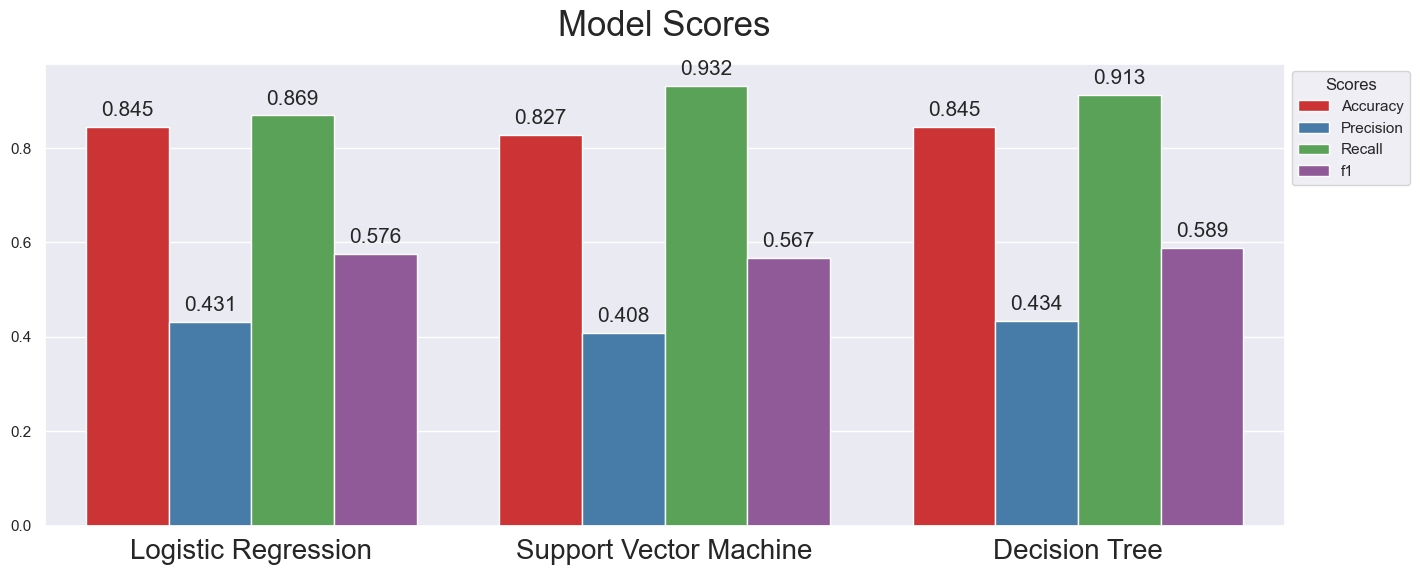

In [424]:
top3_model_melted = pd.melt(top3_model_scores, id_vars='Model', var_name='Scores', value_name='Values')

sns.set(style="darkgrid")
sns.set_palette("Set1")
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Model", y="Values", hue="Scores", data=top3_model_melted)
for i in ax.containers:
    ax.bar_label(i,padding=5,size=15)

ax.legend(title="Scores", loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Model Scores",size=25,pad=20)
plt.xticks(size=20)
plt.xlabel("")
plt.ylabel("")
plt.show()


Bandingkan nilai aktual dengan prediksi masing-masing model.

In [425]:
pd.DataFrame(data=np.stack([lr_pred,svm_pred,dt_pred],axis=1),
             columns=top3_model_scores['Model'],
             index=y_test.values).rename_axis(index="Actual Values")

Model,Logistic Regression,Support Vector Machine,Decision Tree
Actual Values,,,
0,0,0,0
0,1,1,1
0,0,0,0
0,0,0,0
0,0,0,0
...,...,...,...
0,0,0,0
0,0,0,0
1,1,1,1


Simpan semua model akhir untuk penggunaan di masa mendatang seperti untuk membuat prediksi pada data yang belum pernah dilihat sebelumnya.

In [426]:
models = [final_lr_model,final_knn_model,final_svm_model,
          final_dt_model,final_rf_model,final_nb_model]
file_names = ["logistic_regression","k-nearest_neighbors","support_vector_machine",
              "decision_tree","random_forest","naive_bayes"]

for i,j in zip(models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

logistic_regression.joblib has been saved successfully!
k-nearest_neighbors.joblib has been saved successfully!
support_vector_machine.joblib has been saved successfully!
decision_tree.joblib has been saved successfully!
random_forest.joblib has been saved successfully!
naive_bayes.joblib has been saved successfully!
